In [1]:
#importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import json

In [2]:
#importing sql database and creating engine to bypass connestion
from sqlalchemy import create_engine
engine=create_engine("postgresql://postgres:"INSERT PASSWORD"@localhost:5432/steam_sql")
conn=engine.connect()

In [3]:
#query the steam_games_table
steam_games=pd.read_sql("select * from steam_games_table",conn)
steam_games

,record_id,app_id,game_name,developers,publisher,scores,owners,genres
0,153,220,Half-Life 2,Valve,Valve,0.96,1.000000e+10,['Action']
1,333,271590,Grand Theft Auto V,Rockstar North,Rockstar Games,0.96,2.000000e+07,"['Action', 'Adventure']"
2,869,70,Half-Life,Valve,Valve,0.96,5.000000e+06,['Action']
3,904,7670,BioShock,2K Boston,2K,0.96,2.000000e+06,"['Action', 'RPG']"
4,812,620,Portal 2,Valve,Valve,0.95,1.000000e+10,"['Action', 'Adventure']"
...,...,...,...,...,...,...,...,...
994,993,992300,Bloody Spell,NA,NA,0.00,5.000000e+05,"['Action', 'Adventure', 'Indie', 'RPG', 'Early..."
995,994,994280,Gujian3,Japan,Japan,0.00,5.000000e+05,['RPG']
996,995,996470,eFootball PES 2020,Konami Digital Entertainment,Konami Digital Entertainment,0.00,5.000000e+05,['Sports']
997,996,996580,Spyro Reignited Trilogy,Toys for Bob,Activision,0.00,2.000000e+05,"['Action', 'Adventure']"


In [4]:
#query the steam_games_table2
steam_games2=pd.read_sql("select * from steam_games_table2",conn)
steam_games2

,_id,game_name2,positive_votes,negative_votes,ratings,positive_vote_percent
0,0,Counter-Strike: Global Offensive,4164326,574077,0.88,0.88
1,1,Dota 2,1153963,209989,0.84,0.85
2,2,PLAYERUNKNOWN'S BATTLEGROUNDS,835143,713614,0.54,0.54
3,3,Grand Theft Auto V,753802,183417,0.80,0.80
4,4,Tom Clancy's Rainbow Six Siege,660205,91423,0.87,0.88
...,...,...,...,...,...,...
995,995,Next Day: Survival,6013,3476,0.63,0.63
996,996,Skul: The Hero Slayer,6007,525,0.89,0.92
997,997,Nidhogg,5986,747,0.86,0.89
998,998,Domina,5976,789,0.86,0.88


In [5]:
#converting the "game_name2" column name in titles table to "game_name"
steam_games2_rename=steam_games2.rename(
    columns={"game_name2":"game_name"})
steam_games2_rename

,_id,game_name,positive_votes,negative_votes,ratings,positive_vote_percent
0,0,Counter-Strike: Global Offensive,4164326,574077,0.88,0.88
1,1,Dota 2,1153963,209989,0.84,0.85
2,2,PLAYERUNKNOWN'S BATTLEGROUNDS,835143,713614,0.54,0.54
3,3,Grand Theft Auto V,753802,183417,0.80,0.80
4,4,Tom Clancy's Rainbow Six Siege,660205,91423,0.87,0.88
...,...,...,...,...,...,...
995,995,Next Day: Survival,6013,3476,0.63,0.63
996,996,Skul: The Hero Slayer,6007,525,0.89,0.92
997,997,Nidhogg,5986,747,0.86,0.89
998,998,Domina,5976,789,0.86,0.88


In [6]:
#merging the steam_games with steam_games2_rename on "game_name"
combined_steam=pd.merge(steam_games, steam_games2_rename, on="game_name", how="inner")
combined_steam

,record_id,app_id,game_name,developers,publisher,scores,owners,genres,_id,positive_votes,negative_votes,ratings,positive_vote_percent
0,153,220,Half-Life 2,Valve,Valve,0.96,1.000000e+10,['Action'],57,104215,3003,0.96,0.97
1,333,271590,Grand Theft Auto V,Rockstar North,Rockstar Games,0.96,2.000000e+07,"['Action', 'Adventure']",3,753802,183417,0.80,0.80
2,869,70,Half-Life,Valve,Valve,0.96,5.000000e+06,['Action'],142,49095,1855,0.95,0.96
3,904,7670,BioShock,2K Boston,2K,0.96,2.000000e+06,"['Action', 'RPG']",333,22208,1308,0.92,0.94
4,812,620,Portal 2,Valve,Valve,0.95,1.000000e+10,"['Action', 'Adventure']",24,208003,2610,0.98,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,993,992300,Bloody Spell,NA,NA,0.00,5.000000e+05,"['Action', 'Adventure', 'Indie', 'RPG', 'Early...",739,8804,1853,0.81,0.83
884,994,994280,Gujian3,Japan,Japan,0.00,5.000000e+05,['RPG'],337,21939,3557,0.84,0.86
885,995,996470,eFootball PES 2020,Konami Digital Entertainment,Konami Digital Entertainment,0.00,5.000000e+05,['Sports'],458,15556,7083,0.68,0.69
886,996,996580,Spyro Reignited Trilogy,Toys for Bob,Activision,0.00,2.000000e+05,"['Action', 'Adventure']",652,10168,435,0.93,0.96


The r-squared value is 0.002274121261447703


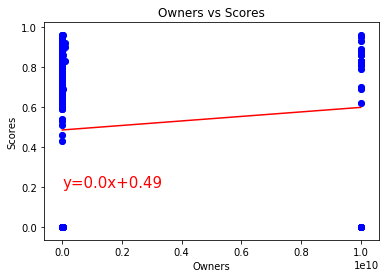

In [8]:
#plotting the data
x_value=combined_steam["owners"]
y_value=combined_steam["scores"]
plt.scatter(x_value,y_value)
plt.title("Owners vs Scores")
plt.xlabel("Owners")
plt.ylabel("Scores")

#getting the linear regression data
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_value,y_value)
regress_value=x_value*slope+intercept
line_eq="y="+str(round(slope,2))+ "x+" +str(round(intercept,2))
plt.scatter(x_value, y_value, marker="o", color="blue")
plt.plot(x_value, regress_value, "r-")
plt.annotate(line_eq, (100000, 0.2), fontsize="15", color="red")
print(f"The r-squared value is {rvalue**2}")

plt.show()